In [ ]:
using DelimitedFiles
using Plots

start_idx = 751
end_idx = 2000

PLOT_FILENAME = "../plots/1_plot.png"
SIMPLE_EXTRAPOLATION_DATA = "../data/simple_extrapolation.txt"
ORIGINAL_EXTRAPOLATION_DATA = "../data/original_extrapolation.txt"
PINN_EXTRAPOLATION_DATA = "../data/1_extrapolation.txt"

"../data/6_extrapolation.txt"

In [20]:
loaded_data = readdlm(ORIGINAL_EXTRAPOLATION_DATA)
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
  27.8086  193.156  17.0693  141.117    -0.0     -0.0   -0.0
  28.4585  192.567  17.0587  141.117    -0.0     -0.0   -0.0
  30.0201  191.98   17.0477  141.117    -0.0     -0.0   -0.0
  32.2325  191.395  17.0371  141.117    -0.0     -0.0   -0.0
  35.2017  190.811  17.027   141.117    -0.0     -0.0   -0.0
  38.9303  190.23   17.0173  141.117    -0.0     -0.0   -0.0
  43.402   189.652  17.0079  141.117    -0.0     -0.0   -0.0
  48.5952  189.075  16.999   141.117    -0.0     -0.0   -0.0
  54.4847  188.5    16.9904  141.117    -0.0     -0.0   -0.0
  61.0419  187.927  16.9823  141.117    -0.0     -0.0   -0.0
   ⋮                                              ⋮    
 140.984   253.725  17.3412   56.0155  121.94    -0.0  121.94
 140.849   253.498  17.3538   55.6121   43.5523  -0.0   43.5523
 140.812   253.159  17.3664   55.369    48.7893  -0.0   48.7893
 140.511   252.606  17.3793   55.1396   -0.0     -0.0   -0.0
 139.875   251.611  17.3922   54.9716   57.4087  -0.0   57.

In [21]:
loaded_data = readdlm(PINN_EXTRAPOLATION_DATA)
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   5.64937   96.6292   5.95916  117.777     0.0253915  51.6272       73.6127
   6.18575   96.149    5.98632  117.912     0.0253915  -2.79061e-5   73.2009
   7.43207   95.6717   6.02535  117.912     0.0253915  -2.79061e-5   72.7816
   9.40367   95.197    6.06416  117.912     0.0253915  -2.79061e-5   72.3648
  12.1102    94.7251   6.10275  117.912     0.0253915  -2.79061e-5   71.9503
  15.5569    94.2558   6.14112  117.912     0.0253915  -2.79061e-5   71.5382
  19.743     93.7893   6.17927  117.911     0.0253915  -2.79061e-5   71.1284
  24.6618    93.3254   6.2172   117.911     0.0253915  -2.79061e-5   70.721
  30.3005    92.8642   6.25491  117.911     0.0253915  -2.79061e-5   70.316
  36.641     92.4057   6.2924   117.911     0.0253915  -2.79061e-5   69.9132
   ⋮                                                    ⋮           
 258.538    249.027   11.6538   -84.8082  288.146       0.0276593   192.718
 257.606    249.51    11.7569   -86.3993  245.311       0.02765

In [22]:
loaded_data = readdlm(SIMPLE_EXTRAPOLATION_DATA)
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]

1250×7 Matrix{Float64}:
   4.42151   65.6914  4.66443  147.24     -5.00582e-6  40.4868      54.9792
   4.82005   65.3678  4.68651  147.363    -5.00582e-6   6.96907e-5  54.6679
   5.73947   65.0461  4.71956  147.363    -5.00582e-6   6.96907e-5  54.3483
   7.17899   64.7263  4.75241  147.363    -5.00582e-6   6.96907e-5  54.0306
   9.13159   64.4084  4.78507  147.363    -5.00582e-6   6.96907e-5  53.7147
  11.5878    64.0923  4.81754  147.363    -5.00582e-6   6.96907e-5  53.4007
  14.5355    63.7781  4.84982  147.363    -5.00582e-6   6.96907e-5  53.0885
  17.9605    63.4657  4.88191  147.363    -5.00582e-6   6.96907e-5  52.7782
  21.846     63.1551  4.91382  147.363    -5.00582e-6   6.96907e-5  52.4696
  26.173     62.8464  4.94553  147.363    -5.00582e-6   6.96907e-5  52.1629
   ⋮                                                    ⋮           
 114.68     110.218   6.33058   78.5971  135.194        7.45595e-5  93.5924
 114.216    110.405   6.38736   77.7616  115.505        7.45595e-5  93.

In [23]:
using Statistics

parameter = 7
simple_data1 = simple_data[:, parameter]
original_data1 = original_data[:, parameter]
pinn_data1 = pinn_data[:, parameter]

println("MSE simple model: ", mean(abs2, simple_data1 .- original_data1))
println("MSE PINN model: ", mean(abs2, simple_data1 .- pinn_data1))


MSE simple model: 53473.77719741718
MSE PINN model: 2658.7838345359983


In [24]:
# Define parameter information with units and descriptions
const PARAM_INFO = Dict(
    1 => (title="Left Ventricular Pressure", ylabel="Pressure (mmHg)", description="LV Pressure"),
    2 => (title="Systemic Arterial Pressure", ylabel="Pressure (mmHg)", description="Arterial Pressure"), 
    3 => (title="Systemic Venous Pressure", ylabel="Pressure (mmHg)", description="Venous Pressure"),
    4 => (title="Left Ventricular Volume", ylabel="Volume (mL)", description="LV Volume"),
    5 => (title="Aortic Valve Flow", ylabel="Flow (mL/s)", description="Aortic Flow"),
    6 => (title="Mitral Valve Flow", ylabel="Flow (mL/s)", description="Mitral Flow"),
    7 => (title="Systemic Flow", ylabel="Flow (mL/s)", description="Systemic Flow")
)

function plot_differences(idx; plt_title=nothing)
    param_info = PARAM_INFO[idx]
    title_text = isnothing(plt_title) ? param_info.title : plt_title
    
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(
        x, y1, 
        label="Original", 
        lw=2,
        title=title_text, 
        xlabel="Time Steps",
        ylabel=param_info.ylabel,
        titlefontsize=10, 
        legendfontsize=8,
        guidefontsize=8
    )
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

function plot_diff_layout(filename::String)
    layout = @layout [a b c; d e f; g h i]

    p = plot(
        plot_differences(1),  # Left Ventricular Pressure
        plot_differences(2),  # Systemic Arterial Pressure  
        plot_differences(3),  # Systemic Venous Pressure
        plot_differences(4),  # Left Ventricular Volume
        plot_differences(5),  # Aortic Valve Flow
        plot_differences(6),  # Mitral Valve Flow
        plot_differences(7),  # Systemic Flow
        layout = layout,
        size = (1200, 900),
        plot_title = "Cardiovascular Model Comparison: Original vs PINN vs Simple",
        plot_titlefontsize = 14,
        margin = 5Plots.mm
    )

    savefig(p, filename)
    return p
end

plot_diff_layout (generic function with 1 method)

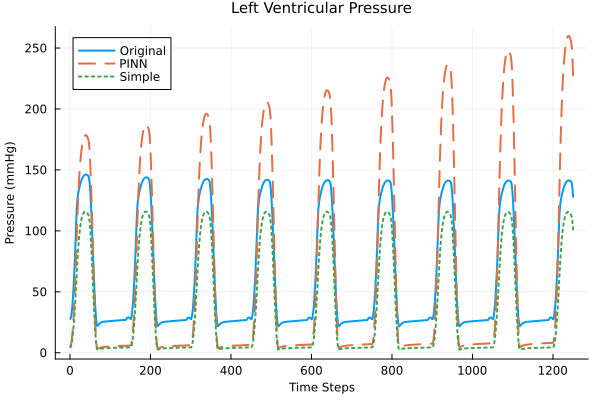

In [25]:
plot_differences(1)

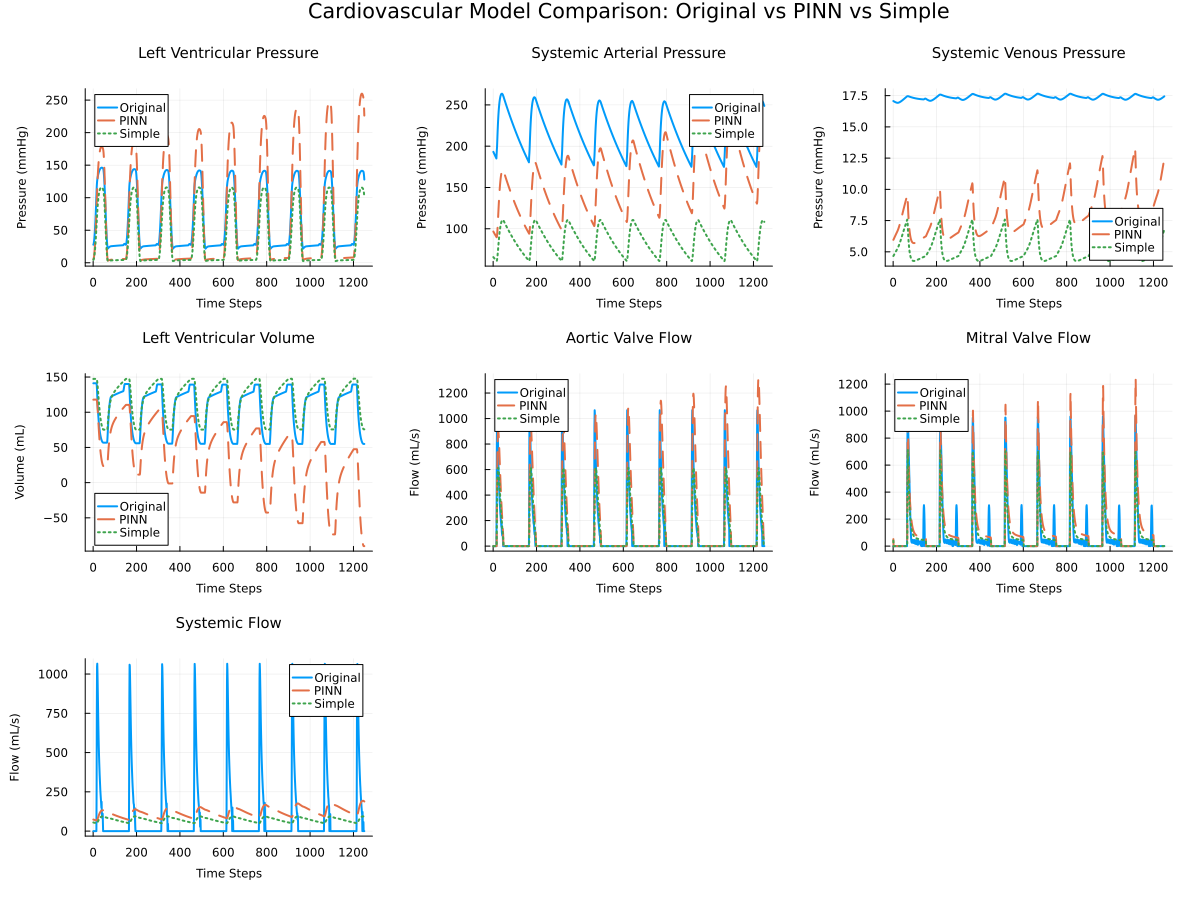

In [26]:
plot_diff_layout(PLOT_FILENAME)